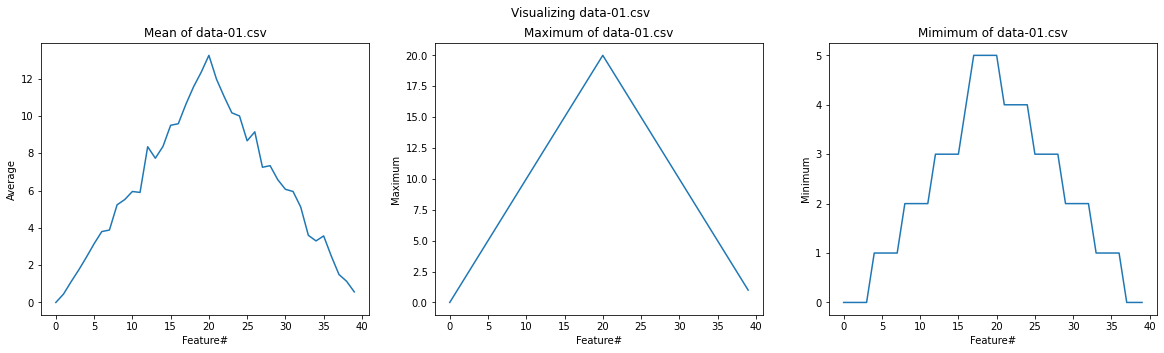

I doubt the integrity of this dataset



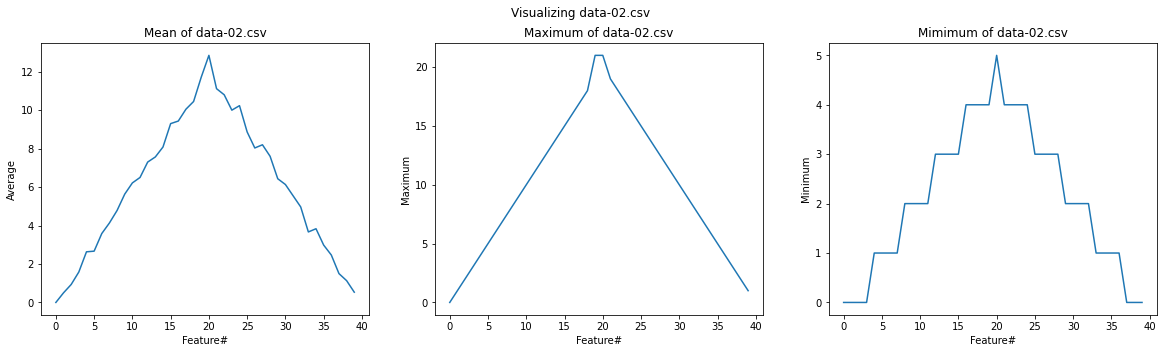

Dataset looks good



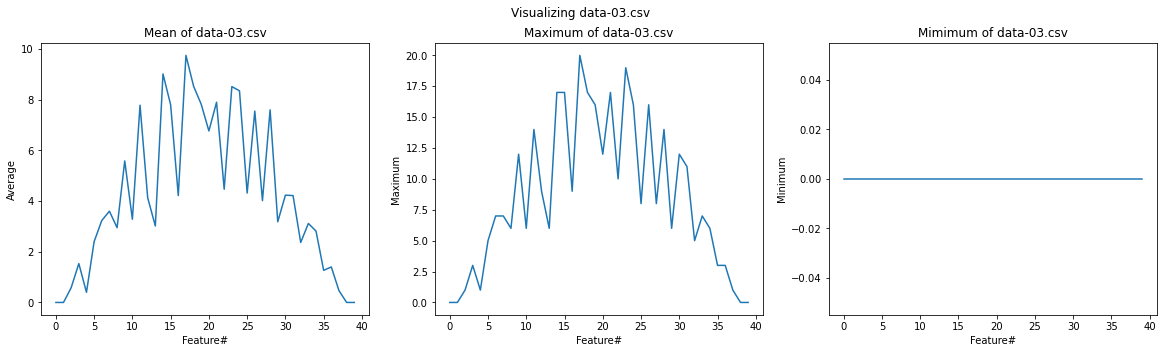

Why is this happening?



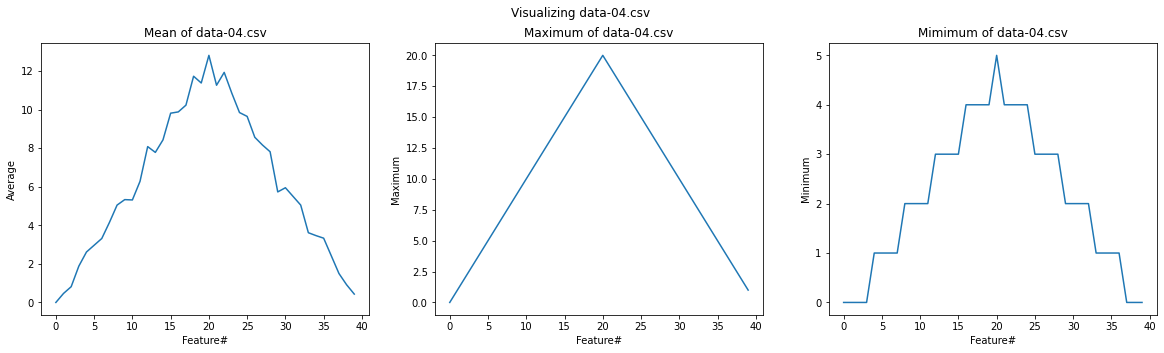

I doubt the integrity of this dataset



In [13]:
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv

dataset = sorted(glob.glob('data*.csv'))
evals = {}  #dictionary for evaluated characteristics


def load_dataset(filename): 
    ''' Loads a dataset from a CSV from a file'''
    
    with open(filename) as csvfile:
        plots = csv.reader(csvfile, delimiter=',')
        x = list(plots)
        result = np.array(x).astype('int')
    return (result)           


def evaluate_dataset(dataset):
    ''' Calculates the min, max & mean per feature and the sum of mins across all features.  Returns a dictionary of evaluated characteristics'''
    
    max = np.amax(dataset,axis=0)
    min = np.amin(dataset, axis=0)
    mean = np.nanmean(dataset, axis=0)
    sum_mins = np.sum(min)    
    return ({"mean":mean, "max":max, "min":min, "sum_mins":sum_mins})


def visualize(dataset, data, evals):
    ''' Plots the evaluated characteristics of the features of a dataset'''
    
    # construct the subplot palette
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
    fig.suptitle('Visualizing ' + dataset)
    ax1.set_title("Mean of " + dataset)
    ax1.set_xlabel("Feature#")
    ax1.set_ylabel("Average")
    
    ax2.set_title("Maximum of " + dataset)
    ax2.set_xlabel("Feature#")
    ax2.set_ylabel("Maximum")
    
    ax3.set_title("Mimimum of " + dataset)
    ax3.set_xlabel("Feature#")
    ax3.set_ylabel("Minimum")


    # construct each of the subplots
    ax1.plot(evals['mean'])
    ax2.plot(evals['max'])
    ax3.plot(evals['min'])   
    
    # display the plots
    plt.show()
    
    return


def identify_issues(evals):
    ''' Tests the evaluated characteristics of a dataset against expected patterns '''
    
    # marshal the evaluated statistics from the evals list
    max = evals['max']
    sum_mins = evals['sum_mins']
        
    # check the dataset characteristics
    if ((max[0]== 0) and (max[20] == 20)):
        print("I doubt the integrity of this dataset\n")
        
    elif (sum_mins == 0):
        print("Why is this happening?\n")
        
    else :
        print("Dataset looks good\n")
    
    return


# Main loop
for datasets in dataset[:4]:

    # load & evaluate the dataset
    data = load_dataset(datasets)
    evals = evaluate_dataset(data) 

    # plot and test the dataset
    visualize(datasets, data, evals)
    identify_issues(evals)
    
    